In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pandas_datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
  Using cached pandas_datareader-0.10.0-py3-none-any.whl.metadata (2.9 kB)
Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


## Лабораторная работа 5.1

In [ ]:
from datetime import datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов.

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день.

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [ ]:
data = np.load('data/average_ratings.npy')
data.shape, data

((3, 1095),
 array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
          5.53729203,  5.52281922],
        [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
         10.        , 10.        ],
        [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
          2.99059315,  2.98746409]]))

In [ ]:
start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 30)
d = timedelta(days=1)

dates = []
current_date = start_date

while current_date <= end_date:
    dates.append(current_date.strftime("%d.%m.%Y"))
    current_date += d

Text(0.5, 1.0, 'Изменение рейтинга трёх рандомных рецепта')

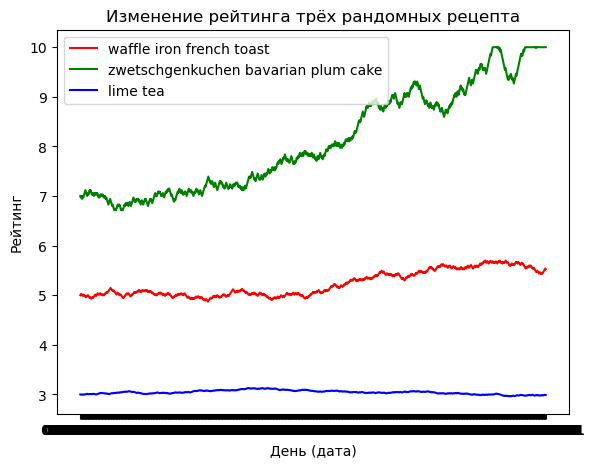

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

y1_line, = ax.plot(dates, data[0], 'r', label = 'waffle iron french toast')
y2_line, = ax.plot(dates, data[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
y3_line, = ax.plot(dates, data[2], 'b', label = 'lime tea')

ax.set_xlabel('День (дата)')
ax.set_ylabel('Рейтинг')
ax.legend(handles=[y1_line, y2_line, y3_line], loc='upper left')
ax.set_title('Изменение рейтинга трёх рандомных рецепта')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


Text(0.5, 1.0, 'Изменение рейтинга трёх рандомных рецепта')

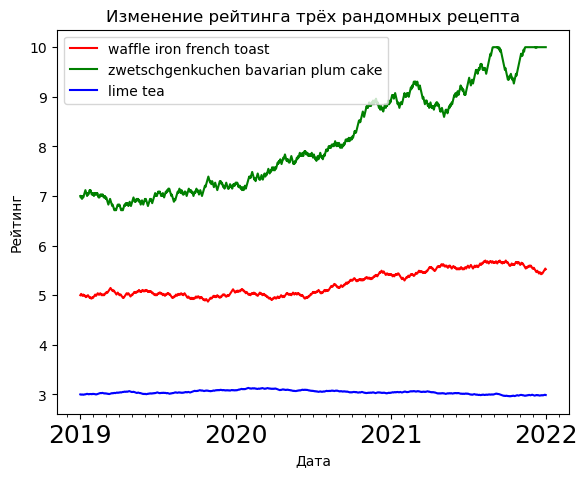

In [ ]:
from matplotlib.ticker import AutoMinorLocator
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

labels = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']
y1_line, = ax.plot(dates, data[0], 'r', label = labels[0])
y2_line, = ax.plot(dates, data[1], 'g', label = labels[1])
y3_line, = ax.plot(dates, data[2], 'b', label = labels[2])

ax.set_xticks(['01.01.2019', '01.01.2020', '01.01.2021', '30.12.2021'])
ax.set_xticklabels([r'2019', r'2020', r'2021', '2022'], fontsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(12))

ax.set_xlabel('Дата')
ax.set_ylabel('Рейтинг')
ax.legend(handles=[y1_line, y2_line, y3_line], loc='upper left')
ax.set_title('Изменение рейтинга трёх рандомных рецепта')

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2.

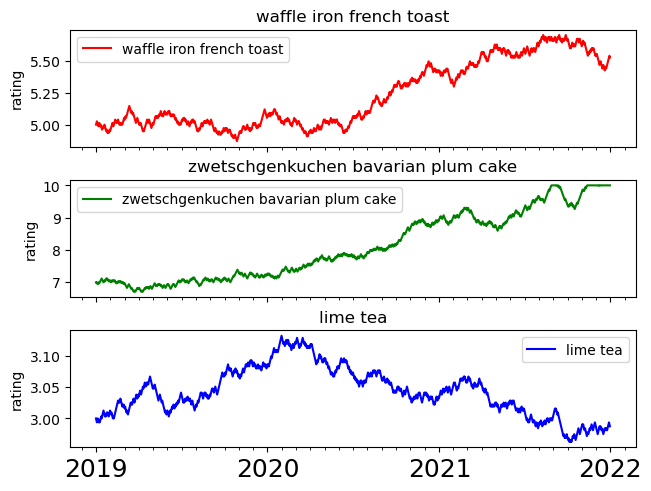

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, layout="constrained", sharex='col')

colors = ['r', 'g', 'b']

for i, axi in enumerate(axes):
    axi.plot(dates, data[i], colors[i])
    axi.set_xticks(['01.01.2019', '01.01.2020', '01.01.2021', '30.12.2021'])
    axi.set_xticklabels([r'2019', r'2020', r'2021', '2022'], fontsize=18)
    axi.xaxis.set_minor_locator(AutoMinorLocator(12))
    axi.set_ylabel('rating')
    axi.set_title(labels[i])
    axi.plot([], [], label=labels[i], color=colors[i])
    axi.legend(loc='best')

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [ ]:
vis = np.load('data/visitors.npy')
vis

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2])

Text(0.5, 1.0, '$𝑦(𝑥)=𝜆𝑒^−$$^𝜆$$^𝑥$')

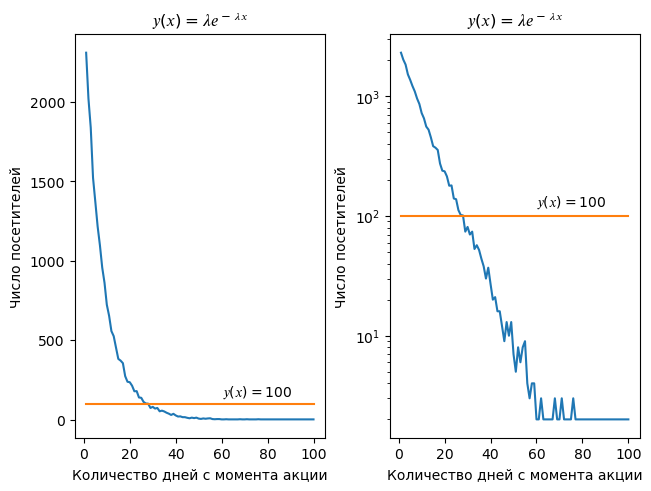

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, layout="constrained")

axes[0].plot([i+1 for i in range(100)], vis)
axes[0].plot([i+1 for i in range(100)], [100 for i in range(100)])
axes[0].text(60, 150, '$𝑦(𝑥)=100$')
axes[0].set_title('$𝑦(𝑥)=𝜆𝑒^−$$^𝜆$$^𝑥$')
axes[0].set_xlabel('Количество дней с момента акции')
axes[0].set_ylabel('Число посетителей')

axes[1].plot([i+1 for i in range(100)], vis)
axes[1].plot([i+1 for i in range(100)], [100 for i in range(100)])
axes[1].set_yscale("log")
axes[1].text(60, 120, '$𝑦(𝑥)=100$')
axes[1].set_xlabel('Количество дней с момента акции')
axes[1].set_ylabel('Число посетителей')
axes[1].set_title('$𝑦(𝑥)=𝜆𝑒^−$$^𝜆$$^𝑥$')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
recipes = pd.read_csv('files/recipes_sample.csv', delimiter=',', parse_dates=['submitted'])
reviews = pd.read_csv('files/reviews_sample.csv', delimiter=',', index_col=0, parse_dates=['date'])

reviews.shape, recipes.shape

((126696, 5), (30000, 8))

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [ ]:
recipes.loc[recipes['minutes'] < 5, 'time_class'] = 'short'
recipes.loc[(recipes['minutes'] >= 5) & (recipes['minutes'] <= 50), 'time_class'] = 'middle'
recipes.loc[recipes['minutes'] > 50, 'time_class'] = 'long'

recipes[recipes.time_class == 1].n_steps

Series([], Name: n_steps, dtype: float64)

In [ ]:
short_recipes = recipes[recipes['minutes'] < 5]
middle_recipes = recipes[((recipes['minutes'] >= 5) & (recipes['minutes'] > 50))]
long_recipes = recipes[recipes['minutes'] >= 50]

<Axes: ylabel='count'>

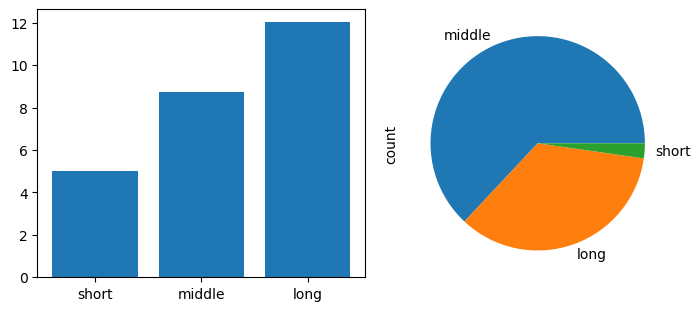

In [ ]:
short_recipes.n_steps.mean()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7,3), layout="constrained")
titles = {'short': recipes[recipes.time_class == 'short'].n_steps.mean(), 'middle': recipes[recipes.time_class == 'middle'].n_steps.mean(), 'long': recipes[recipes.time_class == 'long'].n_steps.mean()}
ax1.bar(list(titles.keys()), [titles['short'], titles['middle'] , titles['long']])
recipes.time_class.value_counts().plot(kind='pie')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [ ]:
reviews.loc[((reviews['date'] >= '01.01.2008') & (reviews['date'] < '01.01.2009')), 'year'] = 2008
reviews.loc[(reviews['date'] >= '01.01.2009') & (reviews['date'] < '01.01.2010'), 'year'] = 2009

reviews_2008_2009 = reviews[(reviews['year'] == 2008) | (reviews['year'] == 2009)]
reviews_2008_2009

,user_id,recipe_id,date,rating,review,year
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy...",2008.0
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...,2008.0
1023302,308434,11252,2008-12-14,5,Oh Bergy! These wonderful little cakes are aw...,2008.0
264646,151754,285773,2008-09-04,0,"This was a very moist cornbread, even two days...",2008.0
126930,379985,150499,2008-08-21,5,I really liked this recipe. It's perfect to ma...,2008.0
...,...,...,...,...,...,...
532061,335737,36548,2008-04-22,5,If only there were more stars to give! Normall...,2008.0
698638,1186693,394518,2009-12-09,0,I must have done something wrong! Mine were v...,2009.0
344676,724631,314698,2008-10-14,5,"5 Stars, The Hunter said the mushrooms and sau...",2008.0
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...,2009.0


In [ ]:
reviews_2008_2009['rating']

187037     4
312179     5
1023302    5
264646     0
126930     5
          ..
532061     5
698638     0
344676     5
1013457    4
1059834    5
Name: rating, Length: 36286, dtype: int64

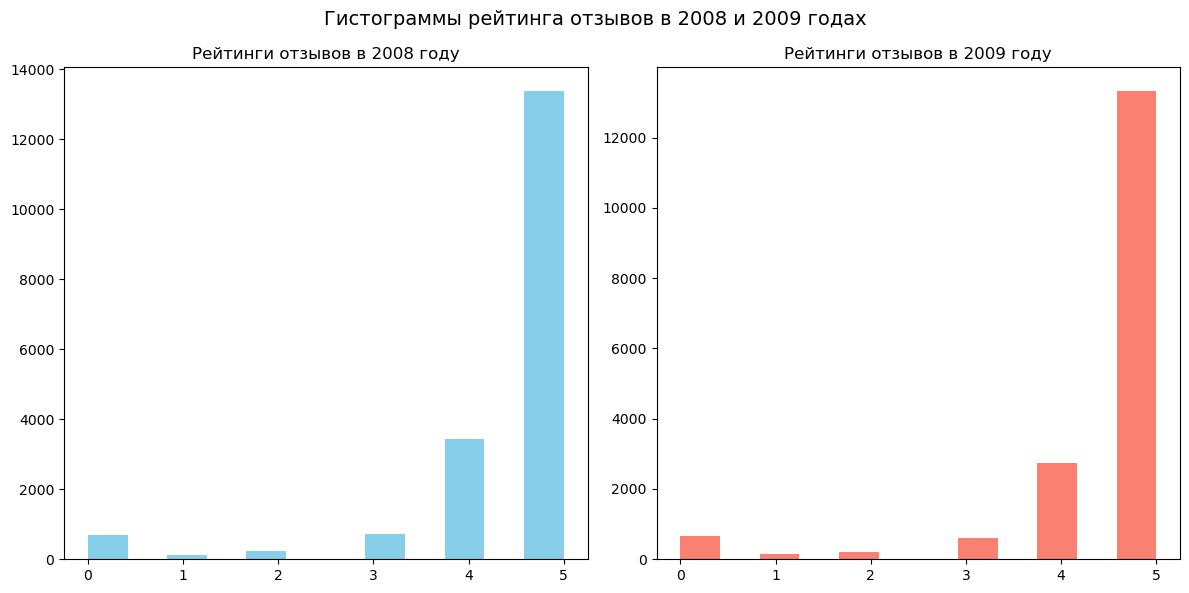

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

reviews_2008 = reviews_2008_2009[reviews_2008_2009['year'] == 2008]
reviews_2009 = reviews_2008_2009[reviews_2008_2009['year'] == 2009]

ax1.hist(reviews_2008['rating'], bins=12, color='skyblue')
ax2.hist(reviews_2009['rating'], bins=12, color='salmon')

ax1.set_title('Рейтинги отзывов в 2008 году')
ax2.set_title('Рейтинги отзывов в 2009 году')

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=14)

plt.tight_layout()
plt.show()


### Визуализация данных при помощи пакета `seaborn`

In [ ]:
import seaborn as sns

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5).

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

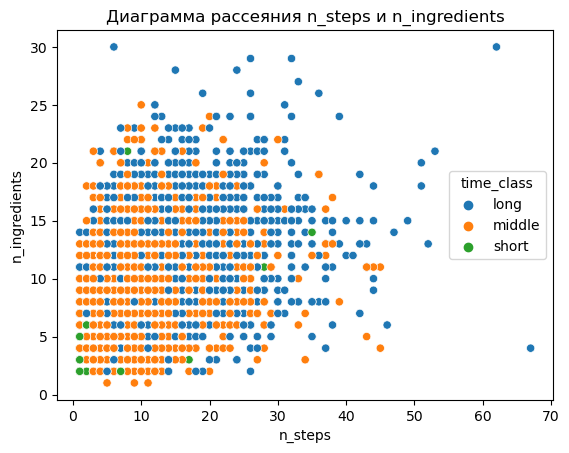

In [ ]:
sns.scatterplot(recipes, x="n_steps", y="n_ingredients", hue='time_class')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap).

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`.

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [ ]:
new_df = recipes.merge(reviews, how='left', left_on='id', right_on='recipe_id')[["minutes", "n_steps", "n_ingredients", 'rating']].dropna(subset=['minutes', 'n_steps', 'n_ingredients', 'rating'])
new_df.describe()

,minutes,n_steps,n_ingredients,rating
count,54324.000000,54324.000000,54324.000000,54324.000000
mean,95.027005,10.073669,9.026268,4.413151
std,916.137000,5.908988,3.720807,1.265147
min,0.000000,1.000000,1.000000,0.000000
25%,23.000000,6.000000,6.000000,4.000000
50%,40.000000,9.000000,9.000000,5.000000
75%,70.000000,13.000000,11.000000,5.000000
max,129615.000000,67.000000,30.000000,5.000000


In [ ]:

correlation_matrix = new_df[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr()
correlation_matrix

,minutes,n_steps,n_ingredients,rating
minutes,1.000000,0.032089,-0.006312,-0.032870
n_steps,0.032089,1.000000,0.293526,-0.022291
n_ingredients,-0.006312,0.293526,1.000000,0.007588
rating,-0.032870,-0.022291,0.007588,1.000000


<Axes: >

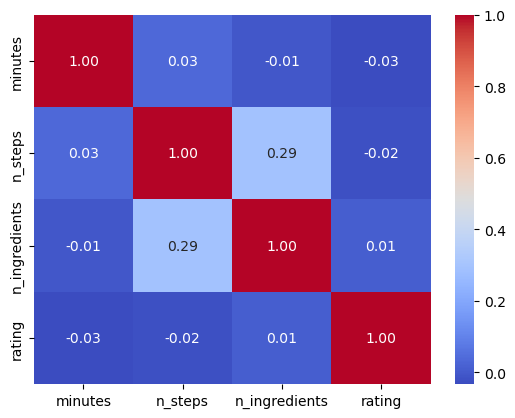

In [ ]:

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")